# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')
pd.set_option('display.max_rows', None)    
pd.set_option('display.max_columns', None)
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### 1. How many neighborhood groups are available and which shows up the most?

In [3]:
groups = air_bnb.groupby('neighbourhood_group').count()
print(f'There are total "{len(groups)}" neighbourhood groups')
showsUp_most = groups.idxmax()
print(f'"{showsUp_most["name"]}" is the neighbourhood group which shows up the most.')


There are total "5" neighbourhood groups
"Manhattan" is the neighbourhood group which shows up the most.


#### 2. Are private rooms the most popular in manhattan?

In [4]:
df_manahattan = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']
total_reviews = df_manahattan.groupby(by='room_type')['reviews_per_month'].sum()
total_reviews.loc[['Entire home/apt', 'Private room', 'Shared room']].reset_index()

,room_type,reviews_per_month
0,Entire home/apt,11378.43
1,Private room,9141.42
2,Shared room,638.23


In [5]:
most_popular_type = total_reviews.idxmax()
print(f"The most popular room type in Manhattan is: '{most_popular_type}'")

The most popular room type in Manhattan is: 'Entire home/apt'


#### 3. Which hosts are the busiest and based on their reviews?

In [6]:
max_per_month = air_bnb['reviews_per_month'].max()
air_bnb[air_bnb['reviews_per_month'] == max_per_month][['host_id','host_name', 'name', 'neighbourhood', 'neighbourhood_group', 'number_of_reviews']]

,host_id,host_name,name,neighbourhood,neighbourhood_group,number_of_reviews
42075,244361589,Row NYC,Enjoy great views of the City in our Deluxe Room!,Theater District,Manhattan,156


#### 4. Which neighorhood group has the highest average price?

In [7]:
average_price = air_bnb.groupby(by='neighbourhood_group')[['price']].mean()
max_price = average_price['price'].idxmax()
max_price

'Manhattan'

#### 5. Which neighbor hood group has the highest total price?

In [8]:
air_bnb['total_price'] = air_bnb['price'] * air_bnb['minimum_nights']

air_bnb.groupby(by='neighbourhood_group')['total_price'].max()
maxi= air_bnb['total_price'].idxmax()
highest_total_price = air_bnb.loc[maxi][['neighbourhood_group', 'total_price']]
highest_total_price



neighbourhood_group    Manhattan
total_price              1170000
Name: 48043, dtype: object

#### 6. Which top 5 hosts have the highest total price?

In [9]:
sorted_air_bnb = air_bnb.sort_values(by='total_price', ascending = False)
sorted_air_bnb[['host_id', 'name', 'neighbourhood', 'neighbourhood_group', 'total_price']].head()

,host_id,name,neighbourhood,neighbourhood_group,total_price
48043,271248669,Luxury TriBeCa Apartment at an amazing price,Tribeca,Manhattan,1170000
9151,20582832,Furnished room in Astoria apartment,Astoria,Queens,1000000
12342,3906464,"Quiet, Clean, Lit @ LES & Chinatown",Lower East Side,Manhattan,989901
17811,41870118,Gorgeous 2 Bedroom apartment,Forest Hills,Queens,857750
44429,9295237,Room with sofa bed or air mattress,Astoria,Queens,730000


#### 7. Who currently has no (zero) availability with a review count of 100 or more?

In [10]:
zero_available = air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100)]
zero_available

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_price
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,158
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,500
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0,150
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0,588
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0,130
220,57468,"Modern, Large East Village Loft",239208,Ori,Manhattan,East Village,40.72821,-73.98701,Entire home/apt,189,3,205,2019-06-23,1.96,1,0,567
250,62461,B NYC Staten Alternative...,303939,Lissette,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,147,2019-06-10,1.44,6,0,74
357,99070,Comfortable Cozy Space in El Barrio,522065,Liz And Melissa,Manhattan,East Harlem,40.79406,-73.94102,Shared room,65,7,131,2019-05-26,1.31,2,0,455
415,140425,Holiday Time in NY - Oh My!!,683975,Ivy,Brooklyn,Crown Heights,40.67550,-73.95878,Private room,79,2,115,2017-05-25,1.18,1,0,158
462,163627,Blue Room in Awesome Artist's Apartment!,242506,Jsun,Brooklyn,Williamsburg,40.71023,-73.96665,Private room,89,3,205,2017-12-31,2.31,3,0,267


In [11]:
zero_available['id'].count()

162

#### 8. What host has the highest total of prices and where are they located?

In [12]:
highest_total_of_prices = air_bnb.groupby('host_id')['price'].sum()
host_with_highest_prices = highest_total_of_prices.idxmax()
host_with_highest_prices
with_location = air_bnb.loc[air_bnb['host_id'] == host_with_highest_prices, ['host_id','neighbourhood_group', 'price']]
with_location['highest_total'] = with_location['price'].sum()
with_location[['host_id','neighbourhood_group', 'highest_total']].head(1)

,host_id,neighbourhood_group,highest_total
38293,219517861,Manhattan,82795


#### 9. When did Danielle from Queens last receive a review?

In [13]:
Danielle_from_Queens = air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')]
Danielle_from_Queens = Danielle_from_Queens.dropna(subset='last_review')
Danielle_from_Queens['last_review'].max()

'2019-07-08'

# Further Questions

#### 1. Which host has the most listings?

In [14]:
most_listings_host_id = air_bnb['host_id'].value_counts().idxmax()
most_listings_host_info = air_bnb[air_bnb['host_id'] == most_listings_host_id].copy()

most_listings_host_info['total_number_of_listings'] = most_listings_host_info.shape[0]

most_listings_host_info[['host_id', 'host_name', 'total_number_of_listings']].head(1)

,host_id,host_name,total_number_of_listings
38293,219517861,Sonder (NYC),327


#### 2. How many listings have completely open availability?

In [15]:
open_availability = len(air_bnb[air_bnb['availability_365'] >= 365])
open_availability

1295

#### 3. What room_types have the highest review numbers?

In [16]:
room_type_review = air_bnb.groupby(by='room_type')['number_of_reviews'].sum()
print('Room types with total number of reviews ')
print(room_type_review)


max_reviews_room_type = room_type_review.idxmax()
print(f'Room type with maximum number of reviews: "{max_reviews_room_type}"')



Room types with total number of reviews 
room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64
Room type with maximum number of reviews: "Entire home/apt"


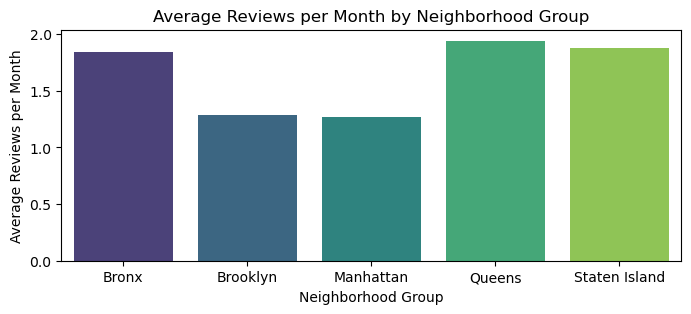

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by neighborhood group and calculate the average reviews_per_month
avg_reviews_by_group = air_bnb.groupby('neighbourhood_group')['reviews_per_month'].mean().reset_index()

# Plotting the comparison
plt.figure(figsize=(8, 3))
sns.barplot(x='neighbourhood_group', y='reviews_per_month', data=avg_reviews_by_group, palette='viridis')
plt.title('Average Reviews per Month by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Reviews per Month')
plt.show()



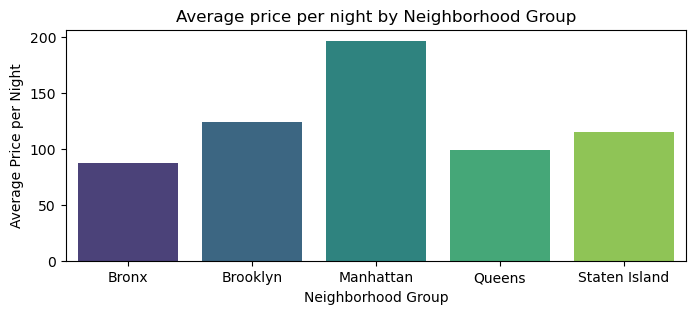

In [34]:
# Group by neighborhood group and calculate the average reviews_per_month
avg_reviews_by_group = air_bnb.groupby('neighbourhood_group')['price'].mean().reset_index()

# Plotting the comparison
plt.figure(figsize=(8, 3))
sns.barplot(x='neighbourhood_group', y='price', data=avg_reviews_by_group, palette='viridis')
plt.title('Average price per night by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Night')
plt.show()



##### This bar plot will show you the average number of reviews per month for each neighborhood group. By examining the heights of the bars, you can identify which neighborhood groups generally receive more reviews. 

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

#### 1. How many neighborhood groups are available and which shows up the most?
There are total "5" neighbourhood groups.

"Manhattan" is the neighbourhood group which shows up the most.

#### 2. Are private rooms the most popular in manhattan?

In evaluating the popularity of different room types in Manhattan, three distinct categories were considered: 'Entire home/apt,' 'Private room,' and 'Shared room.' The assessment was conducted based on both the total number of reviews and the reviews per month metrics.

Upon careful analysis, it was observed that the room type with the highest popularity in Manhattan is 'Entire home/apt.' This conclusion is drawn from a comprehensive examination of the cumulative number of reviews and reviews per month for each room type. The results indicate that 'Entire home/apt' exhibits the most robust and consistent popularity among guests in Manhattan.

#### 3. Which hosts are the busiest and based on their reviews?

Busiest Hosts Based on Reviews Analysis
In assessing the busiest hosts within the dataset, a key metric considered was the 'reviews_per_month.' After careful examination, the host demonstrating the highest level of activity was identified. The details of this prolific host are as follows:

Host ID: 244361589.
Host Name: Row NYC.
Listing Name: Enjoy great views of the City in our Deluxe Room!. 
Neighbourhood: Theater District. 
Neighbourhood Group: Manhattan. 
Number of Reviews: 156


#### 4. Which neighorhood group has the highest average price?

A meticulous examination of the average prices across various neighbourhood groups revealed that "Manhattan" stands out with the highest average price. This conclusion is derived from a comprehensive analysis of pricing data within the dataset.

The elevated average price in Manhattan suggests a premium associated with accommodations in this particular neighbourhood group. Such insights are crucial for potential guests seeking to manage budget considerations and make informed choices when selecting a neighbourhood within the Airbnb platform.

#### 5. Neighbourhood Group with Highest Total Price Analysis
In the exploration of total prices across different neighbourhood groups, 'Manhattan' emerges as the area with the highest total price. 
This determination is derived from calculating the product of the 'price' and 'minimum_nights' columns and subsequently aggregating the maximum total price within each neighbourhood group.

The result indicates that the highest total price, amounting to $1,170,000, is associated with a listing in Manhattan.

#### 6. Top 5 Hosts with the Highest Total Price Analysis
An exploration of the top 5 hosts with the highest total prices reveals the following key information:

1. Host_id: 271248669

   Listing Name: Luxury TriBeCa Apartment at an amazing price
   
   Neighbourhood: Tribeca
   
   Neighbourhood Group: Manhattan
   
   Total Price: $1,170,000
   
2.  Host ID: 20582832

    Listing Name: Furnished room in Astoria apartment
    
    Neighbourhood: Astoria
    
    Neighbourhood Group: Queens
    
    Total Price: $1,000,000
    
    
    
3.  Host ID: 3906464

    Listing Name: Quiet, Clean, Lit @ LES & Chinatown
    
    Neighbourhood: Lower East Side
    
    Neighbourhood Group: Manhattan
    
    Total Price: $989,901
    
4.  Host ID: 41870118

    Listing Name: Gorgeous 2 Bedroom apartment

    Neighbourhood: Forest Hills
    
    Neighbourhood Group: Queens
    
    Total Price: $857,750
    
5.  Host ID: 9295237

    Listing Name: Room with sofa bed or air mattress
    
    Neighbourhood: Astoria
    
    Neighbourhood Group: Queens
    
    Total Price: $730,000

#### 7. Hosts with Zero Availability and Review Count of 100 or More
A total of '162' listings were identified where the availability throughout the year is 0, indicating no availability, and the review count is 100 or more. These listings may suggest that despite high demand, these accommodations are currently not available for booking, potentially due to various reasons such as being fully booked or temporarily unavailable.

For potential guests, this information can be useful to understand the current availability status of listings with high review counts.

#### 8. Host with the Highest Total Prices and Location
The host with highest total of prices is identified based on the sum of prices across all their listings.

Host ID: 219517861
Neighbourhood Group: Manhattan
Highest Total Prices: $82,795

#### 9. When did Danielle from Queens last receive a review?
Upon careful analysis, it was observed that 'Danielle from Queens' recieved their last review on '2019-07-08'.
This information is valuable for both hosts and potential guests, providing insights into the recent feedback received by the host.